<a href="https://colab.research.google.com/github/GUC-DM/w21-berlin-mp-1-salma-elzeky-t1-rawan-ashraf-t1/blob/main/Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Salma Elzeky

ID: 43-5917

Tutorial: T1

---

Name: Rawan Ashraf

ID: 43-2692

Tutorial: T1

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2021/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [3]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer         object
color            object
interior         object
seller           object
mmr              object
sellingprice     object
saledate         object
dtype: object

In [4]:
df.describe()

,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


In [5]:
df.describe(include='object')

,make,model,trim,body,transmission,vin,state,odometer,color,interior,seller,mmr,sellingprice,saledate
count,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578
unique,48,648,1097,71,2,46578,34,39460,20,17,4686,1021,953,2286
top,Ford,Altima,Base,Sedan,automatic,jtebu11f770076150,fl,1.0mi,black,black,"ford motor credit company,llc",$11300,$12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,7871,1610,4851,17171,44928,1,7451,86,9156,20734,1733,168,397,490


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [6]:
df.shape

(46578, 16)

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 16)


In [8]:
df.count()      # Used to count the number of rows

year            46578
make            46578
model           46578
trim            46578
body            46578
transmission    46578
vin             46578
state           46578
condition       46578
odometer        46578
color           46578
interior        46578
seller          46578
mmr             46578
sellingprice    46578
saledate        46578
dtype: int64

In [9]:
print(df.isnull().sum())

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


In [10]:
df = df.drop(['vin', 'seller', 'state'], axis=1)
df.head()

,year,make,model,trim,body,transmission,condition,odometer,color,interior,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,3.9,50404.0mi,black,gray,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,4.9,17846.0mi,gray,—,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,4.1,21122.0mi,silver,black,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,1.9,145303.0mi,black,black,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,4.9,6714.0mi,white,gray,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [11]:
# Remove $ from price before conversion to float
df['mmr'] = df['mmr'].str.strip("$")
# Print header to make sure change was done
df['mmr'].head()

0    11000
1    28700
2    22200
3     3675
4    22500
Name: mmr, dtype: object

In [12]:
# Remove $ from price before conversion to float
df['sellingprice'] = df['sellingprice'].str.strip("$")
# Print header to make sure change was done
df['sellingprice'].head()

0    10900
1    29900
2    24200
3     3200
4    22100
Name: sellingprice, dtype: object

In [13]:
# Remove mi from odometer before conversion to float
df['odometer'] = df['odometer'].str.strip("mi")
# Print header to make sure change was done
df['odometer'].head()

0     50404.0
1     17846.0
2     21122.0
3    145303.0
4      6714.0
Name: odometer, dtype: object

In [14]:
# Convert mmr to float
df['mmr'] = df['mmr'].astype('float')
# Calculate mean of price after conversion
df['mmr'].mean()

13810.58010219417

In [15]:
# Convert price to float
df['sellingprice'] = df['sellingprice'].astype('float')
# Calculate mean of price after conversion
df['sellingprice'].mean()

13669.705204173644

In [16]:
# Convert odometer to float
df['odometer'] = df['odometer'].astype('float')
# Calculate mean of price after conversion
df['odometer'].mean()

66850.64262097987

In [17]:
df['body'].unique()

array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

In [18]:
df['body'] = df['body'].str.lower()
df['body'].unique()

array(['sedan', 'suv', 'e-series van', 'crew cab', 'g sedan', 'wagon',
       'regular cab', 'double cab', 'coupe', 'minivan', 'supercrew',
       'convertible', 'extended cab', 'hatchback', 'van', 'supercab',
       'king cab', 'g convertible', 'quad cab', 'beetle convertible',
       'g coupe', 'crewmax cab', 'club cab', 'access cab',
       'genesis coupe', 'g37 convertible', 'cab plus 4',
       'promaster cargo van', 'mega cab', 'koup', 'elantra coupe',
       'q60 convertible', 'regular-cab', 'xtracab', 'cts coupe',
       'cts wagon', 'granturismo convertible', 'tsx sport wagon',
       'cts-v coupe', 'q60 coupe', 'transit van'], dtype=object)

In [19]:
df[df['sellingprice'].isna()].describe()

,year,condition,odometer,mmr,sellingprice
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [20]:
df[~df['sellingprice'].isna()].describe()

,year,condition,odometer,mmr,sellingprice
count,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000
mean,2010.203401,3.424265,66850.642621,13810.580102,13669.705204
std,3.831316,0.944009,51868.395670,9510.332473,9632.257208
min,1990.000000,1.000000,1.000000,25.000000,150.000000
25%,2008.000000,2.700000,28185.000000,7400.000000,7100.000000
50%,2012.000000,3.600000,51193.000000,12300.000000,12200.000000
75%,2013.000000,4.200000,97146.500000,18250.000000,18200.000000
max,2015.000000,5.000000,999999.000000,146000.000000,230000.000000


In [21]:
df.head()

,year,make,model,trim,body,transmission,condition,odometer,color,interior,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,3.9,50404.0,black,gray,11000.0,10900.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,suv,automatic,4.9,17846.0,gray,—,28700.0,29900.0,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,sedan,automatic,4.1,21122.0,silver,black,22200.0,24200.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,suv,automatic,1.9,145303.0,black,black,3675.0,3200.0,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,e-series van,automatic,4.9,6714.0,white,gray,22500.0,22100.0,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<AxesSubplot:xlabel='color', ylabel='count'>

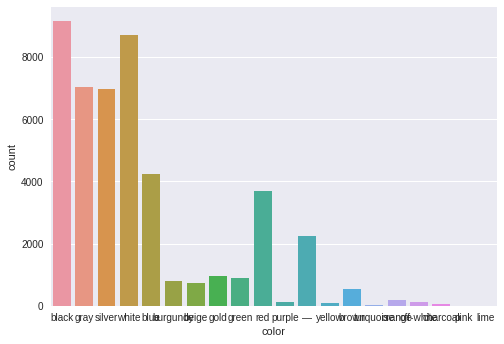

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

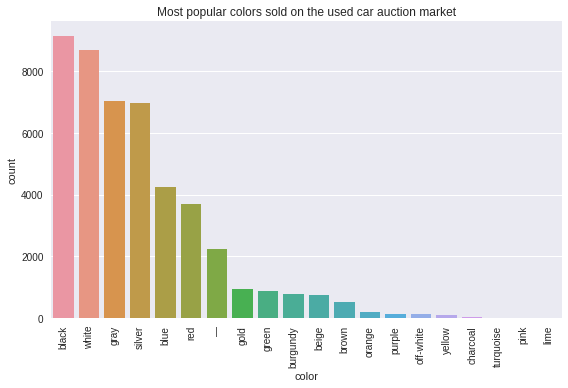

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

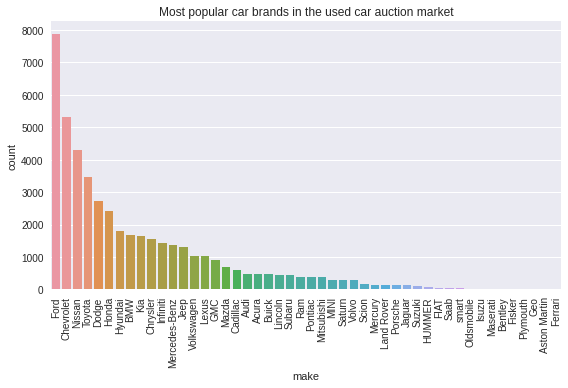

In [22]:
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brands in the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: Ford, Chevrolet, and Nissan are the most popular car brands.

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

In [23]:
df_na_median = df.groupby('transmission').apply(lambda x: x.fillna(x.median()))
df_na_median

year  ...                                 saledate
transmission              ...                                         
automatic    0      2013  ...  Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
             1      2014  ...  Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
             2      2012  ...  Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
             3      2002  ...  Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
             4      2014  ...  Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...                  ...  ...                                      ...
manual       46380  2015  ...  Thu Jun 18 2015 06:00:00 GMT-0700 (PDT)
             46475  1996  ...  Thu Jan 15 2015 01:35:00 GMT-0800 (PST)
             46479  2012  ...  Thu Feb 26 2015 04:30:00 GMT-0800 (PST)
             46486  2007  ...  Wed Dec 31 2014 09:00:00 GMT-0800 (PST)
             46501  2010  ...  Wed Jun 03 2015 04:30:00 GMT-0700 (PDT)

[46578 rows x 13 columns]

In [24]:
automaticValues = df.loc[df.transmission=='automatic']
automaticValues['sellingprice']


0        10900.0
1        29900.0
2        24200.0
3         3200.0
4        22100.0
          ...   
46573    17000.0
46574    21500.0
46575    22000.0
46576    13800.0
46577     9300.0
Name: sellingprice, Length: 44928, dtype: float64

In [25]:
automaticValues['sellingprice'].mean()

13761.075476317665

In [26]:
manualValues = df.loc[df.transmission=='manual']
manualValues['sellingprice']

35       12900.0
36        9200.0
50        2800.0
57        8700.0
100      11400.0
          ...   
46380    23500.0
46475      800.0
46479    23000.0
46486     6100.0
46501     7200.0
Name: sellingprice, Length: 1650, dtype: float64

In [27]:
manualValues['sellingprice'].mean()

11181.775757575757

**Answer for Q2**: Automatic cars sell for 13761 on average. On the other hand, manual cars sell for 11181 on average. So, automatic cars sell for a higher price than manual cars.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

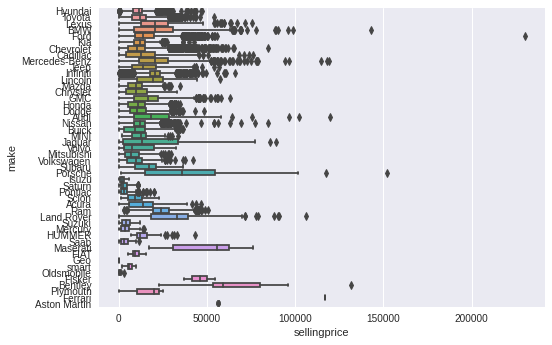

In [28]:
sns.boxplot(x='sellingprice', y='make', data=df);

**Answer for Q3**: Porsche and Jaguar have the widest distribution of selling price. However, Porsche and Plymouth are the most expensive.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

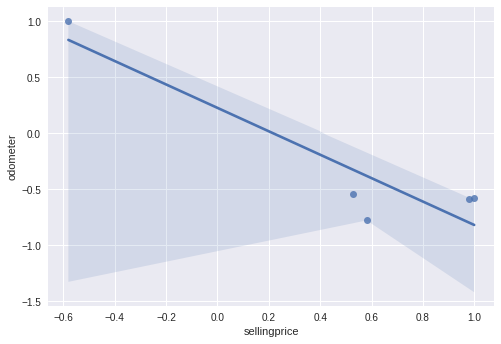

In [29]:
sns.regplot(x="sellingprice", y="odometer", data=df.corr());

In [30]:
corr=df.corr()
corr['odometer'].sort_values(ascending=False, key=lambda x: x.abs())

odometer        1.000000
year           -0.777219
mmr            -0.587920
sellingprice   -0.580900
condition      -0.540371
Name: odometer, dtype: float64

**Answer for Q4**: According to the graph and the dispalyed values, there's no correlation between selling price and odometer.  

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

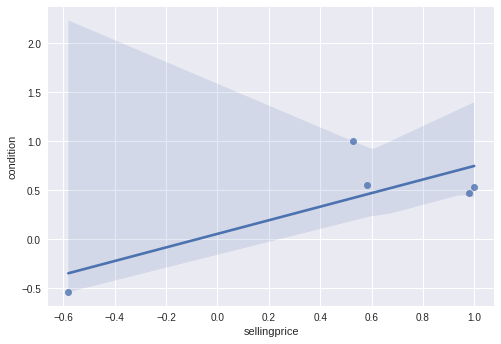

In [31]:
sns.regplot(x="sellingprice", y="condition",data=df.corr());

In [32]:
corr['condition'].sort_values(ascending=False, key=lambda x: x.abs())

condition       1.000000
year            0.549158
odometer       -0.540371
sellingprice    0.529141
mmr             0.476200
Name: condition, dtype: float64

**Answer for Q5**:  According to the graph and the dispalyed values, there is  correlation between them all despite the odometer. 

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

In [33]:
#group the cars by bodies
#get mean of each body
#sort by asscending order 
df[['body', 'sellingprice']].groupby('body').mean().sort_values('sellingprice', ascending=False)

,sellingprice
body,
granturismo convertible,70000.000000
q60 convertible,36600.000000
cts-v coupe,36000.000000
mega cab,28062.500000
q60 coupe,27700.000000
crewmax cab,25926.923077
g convertible,25815.000000
transit van,25200.000000
double cab,22918.065693


**Answer for Q6**: Yes there is definitely a difference and the most expensive car body type is granturismo convertible ,while the least expensive is club cab

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [34]:
df3 = df.drop(['trim', 'body', 'color', 'interior', 'saledate', 'mmr'], axis = 1)

In [35]:
categorical_coulmns = ['make' , 'model', 'transmission']
df_encoded = pd.get_dummies(data=df3, columns=categorical_coulmns, drop_first=True, dtype="int8")



In [38]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('sellingprice', axis=1)
y = df_encoded['sellingprice']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)



## Modelling

_Apply the linear regression model below._

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train);


## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [40]:
lin_reg.score(X_test, y_test)


0.8274594676134531

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: The accuracy of the model is 82.74% which is great and definitely would recommend this model for a used cars dealership. However, there is some data in the dataset that is not important and increases the dataset size and we neededto drop them to be able to understand the data well.

In [41]:
y_pred = lin_reg.predict(X_test)

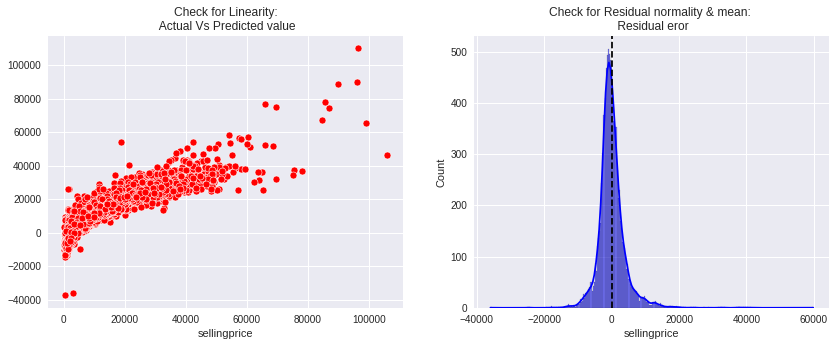

In [42]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

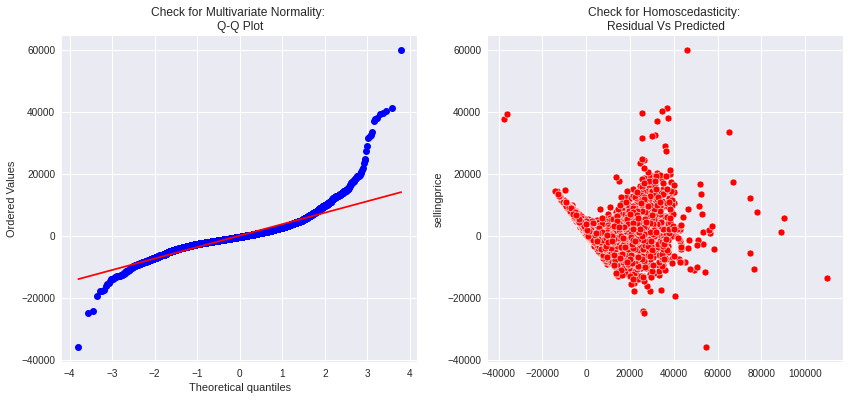

In [43]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred), fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(x=y_pred, y=(y_test - y_pred), ax=ax[1], color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');